In [1]:
# import needed libraries
import sys
import os 
import pickle
from collections import OrderedDict
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
# path of local project
folder_path = "/home/jiaxiangyi/Documents/rvesimulator"
sys.path.insert(0, folder_path) 

# import local packages and functions 
import rvesimulator 
from rvesimulator.simulators.pnas_sve import PnasSVE
from rvesimulator.design_of_experiment.samplers import FixNumberSampler
from rvesimulator.simulators.path_generator import PathGenerator
from rvesimulator.microstructures.microstructure_plots import PlotRVE2D

In [2]:
# create the doe
# define the design space
doe_variables = OrderedDict({"control_points": 7})

# define number of samples
num_points = 1
# define the information of outputs
name_outputs = ["strain", "stress", "plastic_energy"]
doe_sampler = FixNumberSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=123456,
)
data = doe_sampler.data
print(data)

{'samples':    control_points
0             7.0, 'responses':   strain stress plastic_energy
0    NaN    NaN            NaN}


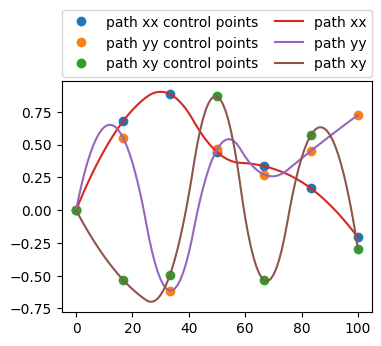

{'samples':    control_points                                         loads_path
0             7.0  [[0.0, 0.052192506021369496, 0.102911958026368..., 'responses':   strain stress plastic_energy
0    NaN    NaN            NaN}


In [3]:
#
loads_path_temp = np.empty([num_points, 1])
loads_path_temp[:] = np.nan
# print(loads_path_temp)
loads_path = pd.DataFrame(loads_path_temp, columns=["loads_path"])
loads_path["loads_path"] = loads_path["loads_path"].astype(object)
# print(loads_path)

# define the path generator
for ii in range(num_points):
    path_generator = PathGenerator(num_control_points=data["samples"].at[ii, "control_points"])   
    loads_path.iloc[ii, 0] = path_generator.quadratic_interpolate()
    path_generator.plot_path()

# add the loads path to the samples
data["samples"] = pd.concat(
    [data["samples"], loads_path], axis=1, join="inner"
)
print(data)

## Benchmark 1 



The simulation information is : {'location_information': [[0.25, 0.75, 1], [0.75, 0.25, 1]], 'len_start': -0.2, 'len_end': 1.2, 'wid_start': -0.2, 'wid_end': 1.2, 'radius': 0.2, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5316978638492222, 0.541825582103651, 0.5491901897169873, 0.5551891864584486, 0.5603417633654516, 0.5649068444639842, 0.5690349813196016, 0.5728225681210433, 0.5763355781923636, 0.5796214341106994, 0.5827155324558011, 0.585645094733533, 0.5884315702256371, 0.5910922039712734, 0.5936410984009242, 0.5960899547185146, 0.5984486044506366, 0.6007253992982465, 0.6029275027715475, 0.6050611121761507, 0.6071316302061533, 0.6091437994192216, 0.6111018089314695, 0.6130093800197907, 0.6148698354997035, 0.616686156474797, 0.6184610291500892, 0.6201968837498333, 0.6218959271038169, 0.6235601701134824, 0.6251914510450486, 0.6267914553968891, 0.6283617329355872, 0.6299037123771667, 0.6314187140982368, 0.6329079611897948, 0.6343725891095284, 0.635813654143156, 

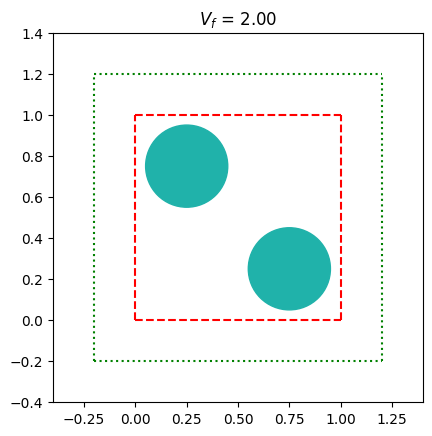

In [4]:
simulation_wrapper = PnasSVE()
simulation_wrapper.update_sim_info(loads=[0.03, 0.03, 0.03], mesh_partition=80, benchmark="benchmark_1", print_info=True)
# plot the micro_structure 
location_info = simulation_wrapper.sim_info["location_information"] 
location_info = np.array(location_info) 
PlotRVE2D.cricle_inclusion_plot(circle_position=location_info,
radius=simulation_wrapper.sim_info["radius"], 
len_start=simulation_wrapper.sim_info["len_start"],
len_end = simulation_wrapper.sim_info["len_end"], 
wid_start=simulation_wrapper.sim_info["wid_start"], 
wid_end = simulation_wrapper.sim_info["wid_end"],
vol_frac=0.02 
 )

In [5]:
results = simulation_wrapper.run_simulation(data=data.copy(),save_source_files=False)
simulation_wrapper.save_data('benchmark_1.pickle')

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/statistic_rve/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.


the simulation time is :40.008849143981934 !
the simulation time is :60.01974439620972 !
the simulation time is :80.01993751525879 !
the simulation time is :100.01989126205444 !
the simulation time is :120.01991653442383 !
the simulation time is :140.02005577087402 !
the simulation time is :160.01967668533325 !
the simulation time is :180.02023196220398 !
the simulation time is :200.02051377296448 !
the simulation time is :220.02064108848572 !
the simulation time is :240.01998925209045 !
the simulation time is :260.0204830169678 !
the simulation time is :280.0204689502716 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 300.0855152606964
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.


# benchmark 2

The simulation information is : {'location_information': [[0.25, 0.5, 1], [0.75, 0.5, 1]], 'len_start': -0.2, 'len_end': 1.2, 'wid_start': -0.2, 'wid_end': 1.2, 'radius': 0.2, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5316978638492222, 0.541825582103651, 0.5491901897169873, 0.5551891864584486, 0.5603417633654516, 0.5649068444639842, 0.5690349813196016, 0.5728225681210433, 0.5763355781923636, 0.5796214341106994, 0.5827155324558011, 0.585645094733533, 0.5884315702256371, 0.5910922039712734, 0.5936410984009242, 0.5960899547185146, 0.5984486044506366, 0.6007253992982465, 0.6029275027715475, 0.6050611121761507, 0.6071316302061533, 0.6091437994192216, 0.6111018089314695, 0.6130093800197907, 0.6148698354997035, 0.616686156474797, 0.6184610291500892, 0.6201968837498333, 0.6218959271038169, 0.6235601701134824, 0.6251914510450486, 0.6267914553968891, 0.6283617329355872, 0.6299037123771667, 0.6314187140982368, 0.6329079611897948, 0.6343725891095284, 0.635813654143156, 0.

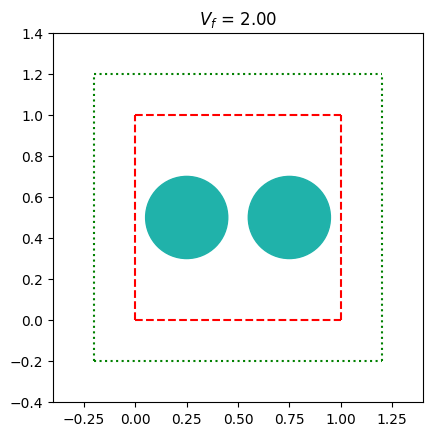

In [6]:
simulation_wrapper.update_sim_info(loads=[0.03, 0.03, 0.03], mesh_partition=80, benchmark="benchmark_2", print_info=True)
# plot the micro_structure 
location_info = simulation_wrapper.sim_info["location_information"] 
location_info = np.array(location_info) 
PlotRVE2D.cricle_inclusion_plot(circle_position=location_info,
radius=simulation_wrapper.sim_info["radius"], 
len_start=simulation_wrapper.sim_info["len_start"],
len_end = simulation_wrapper.sim_info["len_end"], 
wid_start=simulation_wrapper.sim_info["wid_start"], 
wid_end = simulation_wrapper.sim_info["wid_end"],
vol_frac=0.02 
 )


In [7]:
results = simulation_wrapper.run_simulation(data=data.copy(),save_source_files=False)
simulation_wrapper.save_data('benchmark_2.pickle')

remove results succesfully 

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/statistic_rve/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.


the simulation time is :40.00647521018982 !
the simulation time is :60.02040934562683 !
the simulation time is :80.01901245117188 !
the simulation time is :100.01966834068298 !
the simulation time is :120.01873254776001 !
the simulation time is :140.01904296875 !
the simulation time is :160.01883840560913 !
the simulation time is :180.01870608329773 !
the simulation time is :200.01899600028992 !
the simulation time is :220.0190234184265 !
the simulation time is :240.01949787139893 !
the simulation time is :260.01913499832153 !
the simulation time is :280.02059626579285 !
the simulation time is :300.0194025039673 !
the simulation time is :320.01984548568726 !
the simulation time is :340.01945972442627 !
the simulation time is :360.0197432041168 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 380.0695767402649
##################################################
########### START ABAQUS POST ANALYSIS #####

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.


# benchmark 3

The simulation information is : {'location_information': [[0.5, 0.25, 1], [0.5, 0.75, 1]], 'len_start': -0.2, 'len_end': 1.2, 'wid_start': -0.2, 'wid_end': 1.2, 'radius': 0.2, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5316978638492222, 0.541825582103651, 0.5491901897169873, 0.5551891864584486, 0.5603417633654516, 0.5649068444639842, 0.5690349813196016, 0.5728225681210433, 0.5763355781923636, 0.5796214341106994, 0.5827155324558011, 0.585645094733533, 0.5884315702256371, 0.5910922039712734, 0.5936410984009242, 0.5960899547185146, 0.5984486044506366, 0.6007253992982465, 0.6029275027715475, 0.6050611121761507, 0.6071316302061533, 0.6091437994192216, 0.6111018089314695, 0.6130093800197907, 0.6148698354997035, 0.616686156474797, 0.6184610291500892, 0.6201968837498333, 0.6218959271038169, 0.6235601701134824, 0.6251914510450486, 0.6267914553968891, 0.6283617329355872, 0.6299037123771667, 0.6314187140982368, 0.6329079611897948, 0.6343725891095284, 0.635813654143156, 0.

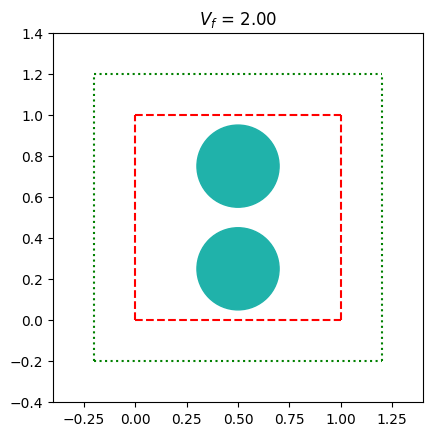

In [8]:
simulation_wrapper.update_sim_info(loads=[0.03, 0.03, 0.03], mesh_partition=80, benchmark="benchmark_3", print_info=True)
# plot the micro_structure 
location_info = simulation_wrapper.sim_info["location_information"] 
location_info = np.array(location_info) 
PlotRVE2D.cricle_inclusion_plot(circle_position=location_info,
radius=simulation_wrapper.sim_info["radius"], 
len_start=simulation_wrapper.sim_info["len_start"],
len_end = simulation_wrapper.sim_info["len_end"], 
wid_start=simulation_wrapper.sim_info["wid_start"], 
wid_end = simulation_wrapper.sim_info["wid_end"],
vol_frac=0.02 
 )


In [9]:
results = simulation_wrapper.run_simulation(data=data.copy(),save_source_files=False)
simulation_wrapper.save_data('benchmark_3.pickle')

remove results succesfully 

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/statistic_rve/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.


the simulation time is :40.00704526901245 !
the simulation time is :60.01990222930908 !
the simulation time is :80.01942658424377 !
the simulation time is :100.01934337615967 !
the simulation time is :120.01927280426025 !
the simulation time is :140.0194227695465 !
the simulation time is :160.01964926719666 !
the simulation time is :180.01920247077942 !
the simulation time is :200.01957941055298 !
the simulation time is :220.01966881752014 !
the simulation time is :240.0196430683136 !
the simulation time is :260.0197377204895 !
the simulation time is :280.01977491378784 !
the simulation time is :300.01987648010254 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 320.09199595451355
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.


# benchmark 4

The simulation information is : {'location_information': [[0.25, 0.25, 1], [0.5, 0.75, 1], [0.75, 0.25, 1]], 'len_start': -0.2, 'len_end': 1.2, 'wid_start': -0.2, 'wid_end': 1.2, 'radius': 0.2, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5316978638492222, 0.541825582103651, 0.5491901897169873, 0.5551891864584486, 0.5603417633654516, 0.5649068444639842, 0.5690349813196016, 0.5728225681210433, 0.5763355781923636, 0.5796214341106994, 0.5827155324558011, 0.585645094733533, 0.5884315702256371, 0.5910922039712734, 0.5936410984009242, 0.5960899547185146, 0.5984486044506366, 0.6007253992982465, 0.6029275027715475, 0.6050611121761507, 0.6071316302061533, 0.6091437994192216, 0.6111018089314695, 0.6130093800197907, 0.6148698354997035, 0.616686156474797, 0.6184610291500892, 0.6201968837498333, 0.6218959271038169, 0.6235601701134824, 0.6251914510450486, 0.6267914553968891, 0.6283617329355872, 0.6299037123771667, 0.6314187140982368, 0.6329079611897948, 0.6343725891095284, 0.6

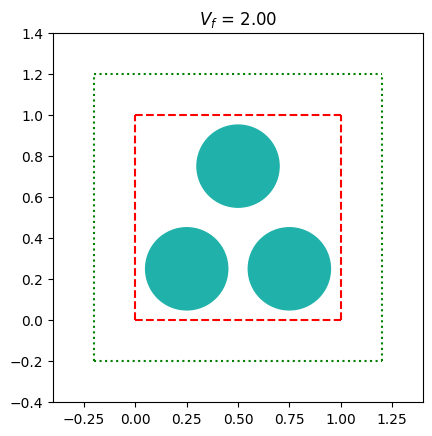

In [10]:
simulation_wrapper.update_sim_info(loads=[0.03, 0.03, 0.03], mesh_partition=80, benchmark="benchmark_4", print_info=True)
# plot the micro_structure 
location_info = simulation_wrapper.sim_info["location_information"] 
location_info = np.array(location_info) 
PlotRVE2D.cricle_inclusion_plot(circle_position=location_info,
radius=simulation_wrapper.sim_info["radius"], 
len_start=simulation_wrapper.sim_info["len_start"],
len_end = simulation_wrapper.sim_info["len_end"], 
wid_start=simulation_wrapper.sim_info["wid_start"], 
wid_end = simulation_wrapper.sim_info["wid_end"],
vol_frac=0.02 
 )



In [11]:
results = simulation_wrapper.run_simulation(data=data.copy(),save_source_files=False)
simulation_wrapper.save_data('benchmark_4.pickle')

remove results succesfully 

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/statistic_rve/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.


the simulation time is :40.0091609954834 !
the simulation time is :60.01731038093567 !
the simulation time is :80.01748871803284 !
the simulation time is :100.02055740356445 !
the simulation time is :120.01842331886292 !
the simulation time is :140.01764702796936 !
the simulation time is :160.01765847206116 !
the simulation time is :180.01780223846436 !
the simulation time is :200.01751518249512 !
the simulation time is :220.01798152923584 !
the simulation time is :240.0182547569275 !
the simulation time is :260.01844477653503 !
the simulation time is :280.0181920528412 !
the simulation time is :300.0202317237854 !
the simulation time is :320.0182595252991 !
the simulation time is :340.0183336734772 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 360.08313822746277
##################################################
########### START ABAQUS POST ANALYSIS ###########
#####################################

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.


# plot all results together 

In [12]:
os.getcwd()

'/home/jiaxiangyi/Documents/rvesimulator/examples/statistic_rve/Data'

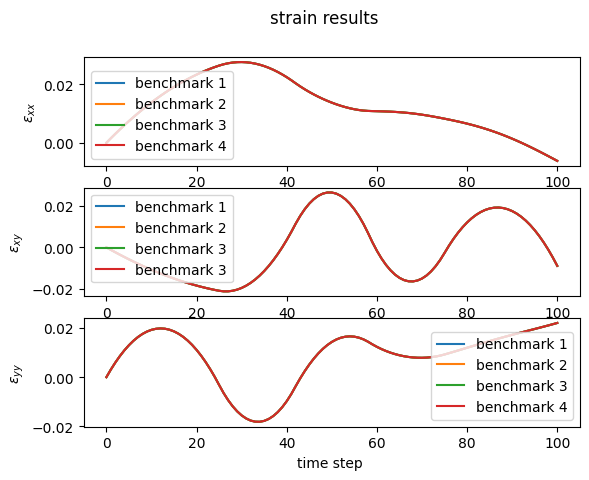

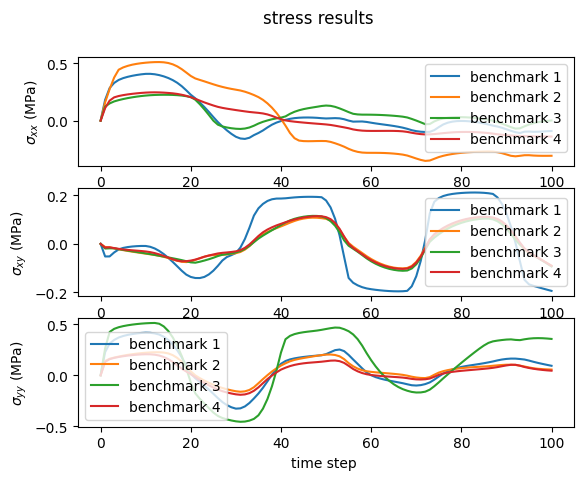

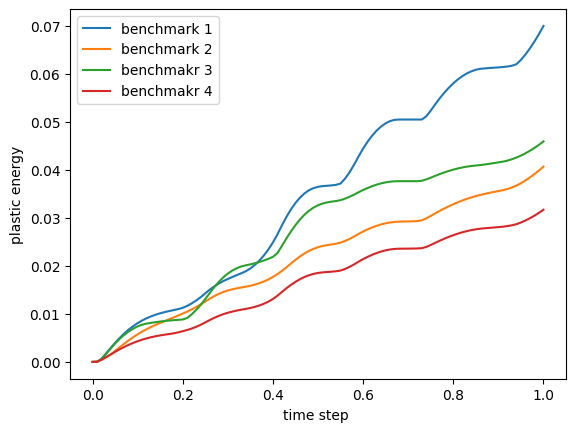

In [13]:
# os.chdir('Data/')
with open("benchmark_1.pickle", "rb") as fd:
    benchmark_1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("benchmark_2.pickle", "rb") as fd:
    benchmark_2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("benchmark_3.pickle", "rb") as fd:
    benchmark_3 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("benchmark_4.pickle", "rb") as fd:
    benchmark_4 = pickle.load(fd, fix_imports=True, encoding="latin1")

results_1 =benchmark_1["responses"]
results_2 =benchmark_2["responses"]
results_3 =benchmark_3["responses"]
results_4 =benchmark_4["responses"]
# result of benchmark1
stress_1 = results_1["stress"].iloc[0]
strain_1 = results_1["strain"].iloc[0]
plastic_energy_1 = results_1["plastic_energy"].iloc[0]
# result of benchmark2
stress_2 = results_2["stress"].iloc[0]
strain_2 = results_2["strain"].iloc[0]
plastic_energy_2 = results_2["plastic_energy"].iloc[0]

# result of benchmark3
stress_3 = results_3["stress"].iloc[0]
strain_3 = results_3["strain"].iloc[0]
plastic_energy_3 = results_3["plastic_energy"].iloc[0]

# result of benchmark4
stress_4 = results_4["stress"].iloc[0]
strain_4 = results_4["strain"].iloc[0]
plastic_energy_4 = results_4["plastic_energy"].iloc[0]


pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xx}$")
fig, ax = plt.subplots(3,1)
ax[0].plot(strain_1[:, 0, 0], label="benchmark 1") 
ax[0].plot(strain_2[:, 0, 0], label="benchmark 2") 
ax[0].plot(strain_3[:, 0, 0], label="benchmark 3") 
ax[0].plot(strain_4[:, 0, 0], label="benchmark 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xy}$")
ax[1].plot(strain_1[:, 0, 1], label="benchmark 1")
ax[1].plot(strain_2[:, 0, 1], label="benchmark 2")
ax[1].plot(strain_3[:, 0, 1], label="benchmark 3")
ax[1].plot(strain_4[:, 0, 1], label="benchmark 3")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{yy}$")
ax[2].plot(strain_1[:, 1, 1], label="benchmark 1") 
ax[2].plot(strain_2[:, 1, 1], label="benchmark 2") 
ax[2].plot(strain_3[:, 1, 1], label="benchmark 3") 
ax[2].plot(strain_4[:, 1, 1], label="benchmark 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('strain results')
plt.savefig('strain.png', dpi=300)

pparam = dict(xlabel='time step ', ylabel="$\sigma_{xx}$ (MPa)")
fig, ax = plt.subplots(3,1)
ax[0].plot(stress_1[:, 0, 0], label="benchmark 1") 
ax[0].plot(stress_2[:, 0, 0], label="benchmark 2") 
ax[0].plot(stress_3[:, 0, 0], label="benchmark 3") 
ax[0].plot(stress_4[:, 0, 0], label="benchmark 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{xy}$ (MPa)")
ax[1].plot(stress_1[:, 1, 0], label="benchmark 1")
ax[1].plot(stress_2[:, 1, 0], label="benchmark 2")
ax[1].plot(stress_3[:, 1, 0], label="benchmark 3")
ax[1].plot(stress_4[:, 1, 0], label="benchmark 4")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{yy}$ (MPa)")
ax[2].plot(stress_1[:, 1, 1], label="benchmark 1") 
ax[2].plot(stress_2[:, 1, 1], label="benchmark 2") 
ax[2].plot(stress_3[:, 1, 1], label="benchmark 3") 
ax[2].plot(stress_4[:, 1, 1], label="benchmark 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('stress results')
# plt.show()
plt.savefig('stress.png', dpi=300)


pparam = dict(xlabel='time step ', ylabel="plastic energy")
fig, ax = plt.subplots()
ax.plot(plastic_energy_1[:,0], plastic_energy_1[:,1], label="benchmark 1") 
ax.plot(plastic_energy_2[:,0], plastic_energy_2[:,1], label="benchmark 2") 
ax.plot(plastic_energy_3[:,0], plastic_energy_3[:,1], label="benchmakr 3") 
ax.plot(plastic_energy_4[:,0], plastic_energy_4[:,1], label="benchmakr 4") 
ax.legend()
ax.set(**pparam)
plt.savefig('energy.png', dpi=300)